In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import timeit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from xgboost import plot_importance

In [4]:
df = pd.read_csv("data/df_final.csv")
df

,Unnamed: 0,customer_ID,P_2_mean,P_2_std,P_2_min,P_2_max,D_39_mean,D_39_std,D_39_min,D_39_max,...,B_30_mode,B_38_mode,D_114_mode,D_116_mode,D_117_mode,D_120_mode,D_126_mode,D_63_mode,D_64_mode,D_68_mode
0,0,-2147467588,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0,0,...,0.0,1.0,0.0,0.0,3.000000,0.116721,0.827053,1,1.724463,5.0
1,1,-2147461914,0.000000,0.000000,0.0,0.0,0.076923,0.27735,0,1,...,1.0,3.0,0.0,0.0,3.558671,1.000000,1.000000,1,3.000000,6.0
2,2,-2147456568,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0,0,...,0.0,7.0,0.0,0.0,3.558671,0.000000,1.000000,1,3.000000,6.0
3,3,-2147448814,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0,0,...,0.0,5.0,0.0,0.0,3.558671,0.000000,0.000000,1,1.000000,2.0
4,4,-2147448315,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0,0,...,0.0,4.0,0.0,0.0,3.000000,0.000000,0.000000,1,3.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458879,458879,2147393588,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0,0,...,0.0,1.0,0.0,0.0,3.558671,1.000000,0.000000,1,3.000000,2.0
458880,458880,2147411856,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0,0,...,1.0,6.0,1.0,0.0,2.000000,0.000000,1.000000,1,1.000000,6.0
458881,458881,2147464011,0.153846,0.375534,0.0,1.0,0.000000,0.00000,0,0,...,0.0,1.0,1.0,0.0,2.000000,0.000000,1.000000,1,1.000000,6.0
458882,458882,2147464257,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0,0,...,0.0,3.0,0.0,0.0,4.000000,0.000000,0.000000,1,1.000000,6.0


# Train-test Split

In [5]:
values = df.drop(columns=['Unnamed: 0', 'target'])
labels = df['target']

# Split
X_train, X_test, y_train, y_test = train_test_split(values, labels, test_size=0.2, random_state=42, stratify=labels)

# Baseline_XGBoost Training

In [17]:
start = timeit.default_timer()
# Initialize the XGBoost Classifier
baseline_XGB = XGBClassifier(random_state=42)
# Fit the model on the training set
baseline_XGB.fit(X_train, y_train)
stop = timeit.default_timer()
print("Time taken for training: ", stop - start)

Time taken for training:  21.402572800005146


In [7]:
# Predict on the test set
baseXGB_preds = baseline_XGB.predict(X_test)

# Evaluate the model performance
# Calculate accuracy
base_XGB_accuracy = accuracy_score(y_test, baseXGB_preds)

# Generate a classification report
base_XGB_classRep = classification_report(y_test, baseXGB_preds)

# Print the results
print(f"Baseline XGBoost model accuracy: {base_XGB_accuracy}\n")
print(f"Baseline XGBoost model classification report:\n{base_XGB_classRep}")

Baseline XGBoost model accuracy: 0.8850474519759852

Baseline XGBoost model classification report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     68013
           1       0.79      0.75      0.77     23764

    accuracy                           0.89     91777
   macro avg       0.85      0.84      0.85     91777
weighted avg       0.88      0.89      0.88     91777



# Hyperparameter Tuning

## General Parameter: Booster

In [52]:
## Try 'gblinear' instead of gbtree

model_gblinear= xgb.XGBClassifier(booster='gblinear',random_state=42)

# Fit the model on the training set
model_gblinear.fit(X_train, y_train)

# Predict on the test set
model_gblinear_preds = model_gblinear.predict(X_test)

# Evaluate the model performance
# Calculate accuracy
model_gblinear_accuracy = accuracy_score(y_test, model_gblinear_preds)

# Generate a classification report
model_gblinear_classRep = classification_report(y_test, model_gblinear_preds)

# Print the results
print(f"model_gblinear accuracy: {model_gblinear_accuracy}\n")
print(f"model_gblinear classification report:\n{model_gblinear_classRep}")

model_gblinear accuracy: 0.881691491332251

model_gblinear classification report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     68013
           1       0.80      0.72      0.76     23764

    accuracy                           0.88     91777
   macro avg       0.85      0.83      0.84     91777
weighted avg       0.88      0.88      0.88     91777



**Witnessed no improvement against default 'gbtree', so defaut value is kept.**

## Feature  importance before tuning

In [8]:
feature_importances = baseline_XGB.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance table
print(feature_importance_df)

       Feature  Importance
696  B_33_last    0.331429
297  R_10_mean    0.034836
643  B_18_last    0.034479
607   R_2_last    0.028056
17    R_1_mean    0.021479
..         ...         ...
539  D_127_min    0.000000
364   R_18_max    0.000000
367   B_31_min    0.000000
368   B_31_max    0.000000
524  D_122_max    0.000000

[762 rows x 2 columns]


### Search and choose the best top number of features

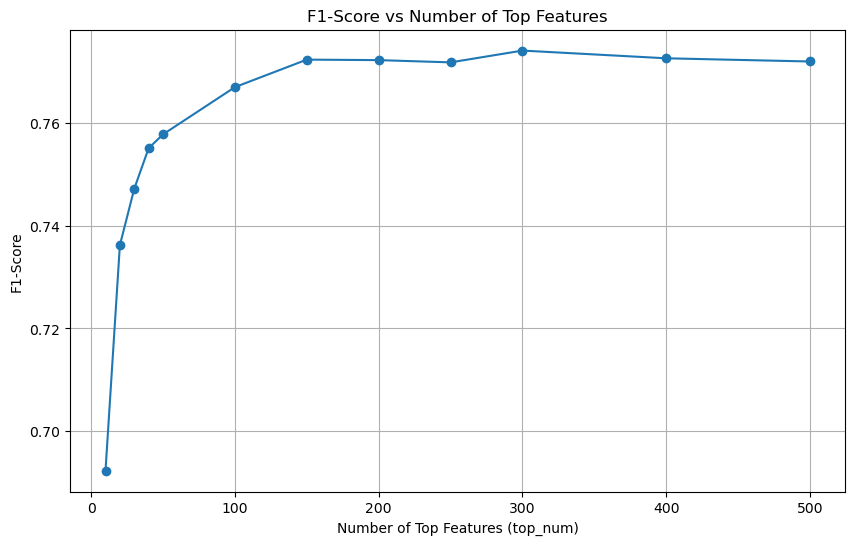

In [65]:
# Range of top_num values to try
top_num_values = [10, 20, 30, 40, 50, 100, 150, 200, 250, 300, 400, 500]
f1_scores = []

for top_num in top_num_values:
    # Selecting top features
    top_features = feature_importance_df['Feature'][:top_num]
    
    # Slicing the datasets to include only the top features
    X_train_topf = X_train[top_features]
    X_test_topf = X_test[top_features]

    # Training the XGBoost model
    topf_XGB = xgb.XGBClassifier(random_state=42)
    topf_XGB.fit(X_train_topf, y_train)

    # Making predictions and evaluating the model
    topf_XGB_preds = topf_XGB.predict(X_test_topf)
    f1 = f1_score(y_test, topf_XGB_preds, average='binary')
    f1_scores.append(f1)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(top_num_values, f1_scores, marker='o')
plt.title('F1-Score vs Number of Top Features')
plt.xlabel('Number of Top Features (top_num)')
plt.ylabel('F1-Score')
plt.grid(True)
plt.show()


In [9]:
top_num = 150         # choose 150 considering best performance and efficiency
top_features = feature_importance_df['Feature'][:top_num]
print(f"To {top_num} Feature Importance Scores:")
print(feature_importance_df.head(top_num))

# pick top 150 features from X_train
X_train_topf = X_train[top_features]
X_test_topf = X_test[top_features]

# train model again with top 150 features
topf_XGB = XGBClassifier(random_state=42)
topf_XGB.fit(X_train_topf, y_train)
topf_XGB_preds = topf_XGB.predict(X_test_topf)
topf_XGB_accuracy = accuracy_score(y_test, topf_XGB_preds)
topf_XGB_classRep = classification_report(y_test, topf_XGB_preds)
print(f"XGBoost model with top {top_num} features accuracy: {topf_XGB_accuracy}\n")
print(f"XGBoost model with top {top_num} features classification report:\n{topf_XGB_classRep}")

To 150 Feature Importance Scores:
        Feature  Importance
696   B_33_last    0.331429
297   R_10_mean    0.034836
643   B_18_last    0.034479
607    R_2_last    0.028056
17     R_1_mean    0.021479
..          ...         ...
754  D_114_mode    0.000731
644   B_19_last    0.000707
33    D_43_mean    0.000706
158    D_59_std    0.000703
636   B_15_last    0.000698

[150 rows x 2 columns]
XGBoost model with top 150 features accuracy: 0.8851564117371454

XGBoost model with top 150 features classification report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     68013
           1       0.79      0.75      0.77     23764

    accuracy                           0.89     91777
   macro avg       0.85      0.84      0.85     91777
weighted avg       0.88      0.89      0.88     91777



**Slightly outperformed original model, and most importantly, will save time and resources for following tuning steps**

## GridSearchCV

In [72]:
# Define the parameter grid
space = {
    'max_depth': [5, 7],
    'gamma': [0.2, 0.5],
    'n_estimators': [150, 200],
    'min_child_weight': [1, 3],
    'subsample': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Start timing
start = timeit.default_timer()

# Initialize GridSearchCV with the model using top features
topf_XGB = XGBClassifier(random_state=42)
xgb_grid = GridSearchCV(topf_XGB, space, cv=3, scoring="f1")

# Fit GridSearchCV on the dataset with top features
xgb_grid.fit(X_train_topf, y_train)

# Stop timing
stop = timeit.default_timer()

# Retrieve the best hyperparameters and best model
print("Best Params: ", xgb_grid.best_params_)
best_xgb = xgb_grid.best_estimator_

# Train the best model on the top features
best_xgb.fit(X_train_topf, y_train)

# Predictions and evaluations using the best model
topf_XGB_preds = best_xgb.predict(X_test_topf)
print("XGBoost model with top features accuracy after tuning: ", accuracy_score(y_test, topf_XGB_preds))
print("XGBoost model with top features classification report after tuning:\n", classification_report(y_test, topf_XGB_preds))

# Print the time taken for hyperparameter tuning
print("Time taken for hyperparameter tuning: ", stop - start)


Best Params:  {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.6}
XGBoost model with top features accuracy after tuning:  0.8850692439282173
XGBoost model with top features classification report after tuning:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92     68013
           1       0.79      0.75      0.77     23764

    accuracy                           0.89     91777
   macro avg       0.85      0.84      0.85     91777
weighted avg       0.88      0.89      0.88     91777

Time taken for hyperparameter tuning:  2415.0782383999976


## Random Search within the area from results above

In [11]:
# Define the parameter distribution
param_dist = {
    'max_depth': randint(6, 9),  # Around the best value of 7
    'gamma': uniform(0.3, 0.7),  # Around the best value of 0.5
    'n_estimators': randint(180, 220),  # Around the best value of 200
    'min_child_weight': randint(1, 5),  # Around the best value of 3
    'learning_rate': uniform(0.05, 0.15)  # Around the best value of 0.1
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(XGBClassifier(subsample=0.6, random_state=42), param_dist,   # the best value of 0.6
                                   n_iter=50, cv=3, scoring='f1', n_jobs=-1, verbose=2, random_state=42)

# Start timing
start = timeit.default_timer()

# Fit RandomizedSearchCV
random_search.fit(X_train_topf, y_train)

# Stop timing
stop = timeit.default_timer()

# Retrieve the best hyperparameters and best model
print("Best Params from Random Search: ", random_search.best_params_)
best_xgb = random_search.best_estimator_

# Predictions and evaluations using the best model
topf_XGB_preds = best_xgb.predict(X_test_topf)
print("XGBoost model with top features accuracy after Random Search: ", accuracy_score(y_test, topf_XGB_preds))
print("XGBoost model with top features classification report after Random Search:\n", classification_report(y_test, topf_XGB_preds))

# Print the time taken for hyperparameter tuning
print("Time taken for Random Search hyperparameter tuning: ", stop - start)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Params from Random Search:  {'gamma': 0.7847052230231892, 'learning_rate': 0.09041185006977823, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 211}
XGBoost model with top features accuracy after Random Search:  0.8858755461608028
XGBoost model with top features classification report after Random Search:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92     68013
           1       0.79      0.75      0.77     23764

    accuracy                           0.89     91777
   macro avg       0.86      0.84      0.85     91777
weighted avg       0.88      0.89      0.88     91777

Time taken for Random Search hyperparameter tuning:  382.0275765999977


## Bayesian Tuning

In [73]:
# Define the search space for hyperparameters
search_space = {
    'max_depth': Integer(3, 10),
    'gamma': Real(0.1, 1.0, 'log-uniform'),
    'n_estimators': Integer(100, 300),
    'min_child_weight': Integer(1, 10),
    'subsample': Real(0.5, 1.0, 'uniform'),
    'learning_rate': Real(0.01, 0.2, 'log-uniform')
}

# Initialize the Bayesian optimizer
bayes_opt = BayesSearchCV(
    estimator=XGBClassifier(random_state=42),
    search_spaces=search_space,
    scoring='f1',
    cv=3,
    n_iter=32,  # increase if computational resources allow
    random_state=42,
    n_jobs=-1
)

# Start timing
start = timeit.default_timer()

# Perform the search
bayes_opt.fit(X_train_topf, y_train)

# Stop timing
stop = timeit.default_timer()

# Best parameters
print("Best Parameters: ", bayes_opt.best_params_)

# Retrieve the best model
best_xgb_bayes = bayes_opt.best_estimator_

# Train the best model on the top features
best_xgb_bayes.fit(X_train_topf, y_train)

# Predictions and evaluations using the best model
topf_XGB_preds_bayes = best_xgb_bayes.predict(X_test_topf)
print("XGBoost model with top features accuracy after Bayesian tuning: ", accuracy_score(y_test, topf_XGB_preds_bayes))
print("XGBoost model with top features classification report after Bayesian tuning:\n", classification_report(y_test, topf_XGB_preds_bayes))

# Print the time taken for Bayesian hyperparameter tuning
print("Time taken for Bayesian hyperparameter tuning: ", stop - start)


Best Parameters:  OrderedDict([('gamma', 0.8906985695704995), ('learning_rate', 0.03541755294887237), ('max_depth', 10), ('min_child_weight', 1), ('n_estimators', 300), ('subsample', 0.5)])
XGBoost model with top features accuracy after Bayesian tuning:  0.8848622203820129
XGBoost model with top features classification report after Bayesian tuning:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92     68013
           1       0.79      0.75      0.77     23764

    accuracy                           0.88     91777
   macro avg       0.85      0.84      0.85     91777
weighted avg       0.88      0.88      0.88     91777

Time taken for Bayesian hyperparameter tuning:  1357.0170566000015


# Final Model Performance & Feature Importance Graph

## Final Model Performance

In [14]:
## Parameters found from Random Search have the best performance

best_params = {
    'gamma': 0.7847052230231892,
    'learning_rate': 0.09041185006977823,
    'max_depth': 8,
    'min_child_weight': 3,
    'n_estimators': 211
}
start = timeit.default_timer()
# Initialize and train the model
model = xgb.XGBClassifier(**best_params, subsample = 0.6, random_state=42)
model.fit(X_train_topf, y_train)
stop = timeit.default_timer()
# Predictions and evaluation
predictions = model.predict(X_test_topf)
accuracy = accuracy_score(y_test, predictions)

print("Final XGBoost Model Accuracy: ", accuracy)
print("Final XGBoost Model Classification Report:\n", classification_report(y_test, predictions))
print("Time taken for training: ", stop - start)

Final XGBoost Model Accuracy:  0.8858755461608028
Final XGBoost Model Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92     68013
           1       0.79      0.75      0.77     23764

    accuracy                           0.89     91777
   macro avg       0.86      0.84      0.85     91777
weighted avg       0.88      0.89      0.88     91777

Time taken for training:  4.516819699994812


## Plot the top 10 important features

Feature: B_33_last	, Score: 0.5299999713897705
Feature: B_18_last	, Score: 0.05000000074505806
Feature: R_2_last	, Score: 0.029999999329447746
Feature: R_1_mean	, Score: 0.019999999552965164
Feature: R_2_mean	, Score: 0.019999999552965164
Feature: R_10_mean	, Score: 0.009999999776482582
Feature: B_33_mean	, Score: 0.009999999776482582
Feature: B_8_mean	, Score: 0.009999999776482582
Feature: R_10_std	, Score: 0.009999999776482582
Feature: D_120_last	, Score: 0.009999999776482582


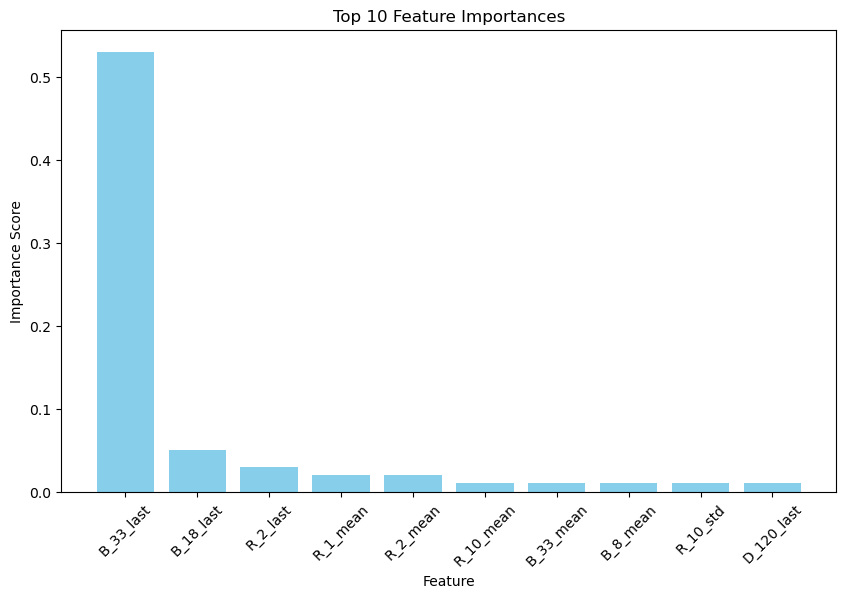

In [15]:
columns = np.array(X_train_topf.columns)
importance = model.feature_importances_

def plot_top_n_feature_importance(importance, columns, n=10):
    # Combine feature names and their importance scores
    feature_importances = [(feature, round(score, 2)) for feature, score in zip(columns, importance)]

    # Sort the feature importances by most important first
    feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

    # Select the top n features
    top_features = feature_importances[:n]
    
    # Print feature importance
    for feature, score in top_features:
        print(f'Feature: {feature}\t, Score: {score}')

    # Extracting the names and scores for plotting
    names = [feature for feature, _ in top_features]
    scores = [score for _, score in top_features]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(names, scores, color='skyblue')
    plt.xticks(rotation=45)
    plt.xlabel("Feature")
    plt.ylabel("Importance Score")
    plt.title('Top 10 Feature Importances')
    plt.show()

# Plot the top ten important features
plot_top_n_feature_importance(importance, columns)


## Plot Distribution of All 150 important features

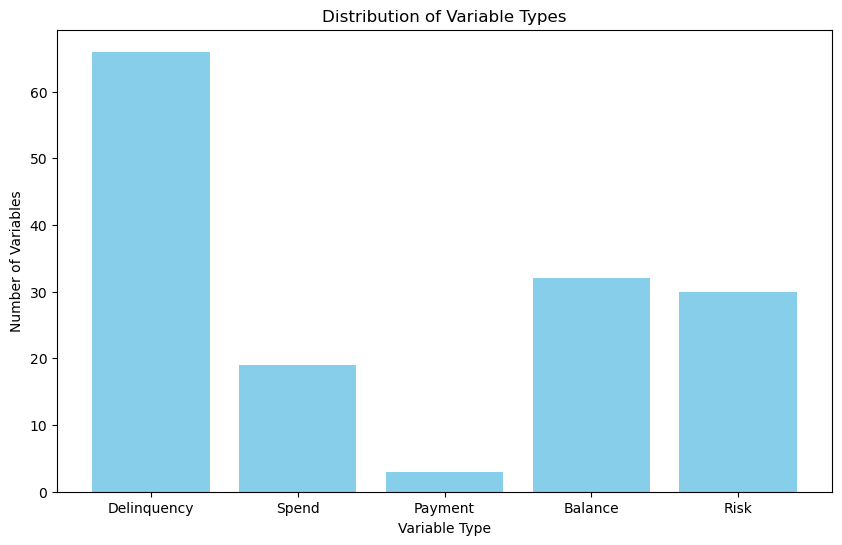

In [16]:
# Categorize columns
categories = {'D_*': 'Delinquency', 'S_*': 'Spend', 'P_*': 'Payment', 'B_*': 'Balance', 'R_*': 'Risk'}
category_counts = {'Delinquency': 0, 'Spend': 0, 'Payment': 0, 'Balance': 0, 'Risk': 0}

# Count occurrences of each category
for col in X_train_topf.columns:
    for prefix, category in categories.items():
        if col.startswith(prefix.replace('*', '')):
            category_counts[category] += 1
            break

# Create a bar plot for the distribution
plt.figure(figsize=(10, 6))
plt.bar(category_counts.keys(), category_counts.values(), color='skyblue')
plt.xlabel('Variable Type')
plt.ylabel('Number of Variables')
plt.title('Distribution of Variable Types')
plt.show()